In [204]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [766]:
file_list = glob.glob('./datafiles/morningstar/*.csv')
file_list

df_list = []
for i in file_list:
    df = pd.read_csv(i)
    df_list.append(df)

ms = pd.concat(df_list)
ms = ms.rename(columns={'Ticker':'Symbol'})
ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822943 entries, 0 to 4
Data columns (total 14 columns):
CUSIP                     822943 non-null object
CategoryName              822943 non-null object
EquityStyleboxName        26939 non-null object
EquityStyleboxShort       26939 non-null object
FundName                  822943 non-null object
IndexStrategyBoxVerbal    27171 non-null object
MStarID                   822943 non-null object
MorninstarStylebox        26939 non-null object
ProviderCompanyName       795772 non-null object
SecurityType              822943 non-null object
ShareClassType            822943 non-null object
Symbol                    822943 non-null object
Unnamed: 11               0 non-null float64
Unnamed: 8                0 non-null float64
dtypes: float64(2), object(12)
memory usage: 94.2+ MB


In [809]:
ms.head()

,CUSIP,CategoryName,EquityStyleboxName,EquityStyleboxShort,FundName,IndexStrategyBoxVerbal,MStarID,MorninstarStylebox,ProviderCompanyName,SecurityType,ShareClassType,Symbol,Unnamed: 11,Unnamed: 8
0,06828M306,Foreign Large Growth,NaN,NaN,Baron International Growth Retail,,FOUSA08N5P,NaN,NaN,FO,Adv,BIGFX,NaN,NaN
1,47804A817,Diversified Emerging Mkts,NaN,NaN,JHancock Emerging Markets NAV,,FOUSA06GNT,NaN,NaN,FO,Other,JEVNX,NaN,NaN
2,39137C503,High Yield Bond,NaN,NaN,Great-West Putnam High Yield Bond Inv,,FOUSA04AI3,NaN,NaN,FO,Other,MXHYX,NaN,NaN
3,39137C305,Intermediate-Term Bond,NaN,NaN,Great-West Core Bond Inv,,FOUSA04AI2,NaN,NaN,FO,Other,MXFDX,NaN,NaN
4,245908736,High Yield Bond,NaN,NaN,Delaware High-Yield Opportunities R,,FOUSA04AHR,NaN,NaN,FO,Retirement,DHIRX,NaN,NaN


In [772]:
import glob

file_list = glob.glob('./datafiles/XigniteAssetClassification/Classification_*.csv')
file_list

df_list = []
for i in file_list:
    df = pd.read_csv(i, sep='|')
    df_list.append(df)

pdsecac = pd.concat(df_list)

pdsecac.pdsecac.drop_duplicates(inplace=True)info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978365 entries, 0 to 8755
Data columns (total 20 columns):
AsOfDate                int64
Valoren                 int64
CUSIP                   object
ISIN                    object
SEDOL                   float64
Currency                object
Exchange                object
Symbol                  object
Name                    object
ShortName               object
Prefix                  object
Suffix                  object
InstrumentClass         object
CFICode                 object
CountryName             object
CountryCode             object
CategoryName            object
ClassificationName      object
AllocationPercentage    float64
LastModified            int64
dtypes: float64(2), int64(3), object(15)
memory usage: 317.0+ MB


In [810]:
pdsecac.head()

,AsOfDate,Valoren,CUSIP,ISIN,SEDOL,Currency,Exchange,Symbol,Name,ShortName,Prefix,Suffix,InstrumentClass,CFICode,CountryName,CountryCode,CategoryName,ClassificationName,AllocationPercentage,LastModified
0,91020180700,998291,Z69303206,XC0009695252,NaN,CAD,XTSE,0000,S&P Indices S&P/TSX Composite Index,S&P/TSX Composite,S&P/TSX Composite Index,NaN,Indices,MRIXXX,United States,US,Sector,Unknown,100.0,41820181754
1,91020180700,1332658,003069101,CA0030691012,NaN,CAD,XTSE,AAB,Aberdeen International Inc,Aberdeen Intl Rg,Registered Shs,NaN,Stock,ESVUFR,Canada,CA,Asset class,Stock,100.0,11820180922
2,91020180700,1332658,003069101,CA0030691012,NaN,CAD,XTSE,AAB,Aberdeen International Inc,Aberdeen Intl Rg,Registered Shs,NaN,Stock,ESVUFR,Canada,CA,Sector,Miscellaneous,100.0,11820180922
3,91020180700,1332658,003069101,CA0030691012,NaN,CAD,XTSE,AAB,Aberdeen International Inc,Aberdeen Intl Rg,Registered Shs,NaN,Stock,ESVUFR,Canada,CA,Country,CA,100.0,11820180922
4,91020180700,1332658,003069101,CA0030691012,NaN,CAD,XTSE,AAB,Aberdeen International Inc,Aberdeen Intl Rg,Registered Shs,NaN,Stock,ESVUFR,Canada,CA,Style,High Risk Low Reward,100.0,11820180922


In [777]:
subasset = pdsecac[pdsecac.CategoryName.isin(['Sector'])]
pdsecac_pivot = subasset.pivot_table(
        index=['Symbol','Exchange'], 
         columns='ClassificationName', 
         values='AllocationPercentage',
         aggfunc='first'
).reset_index()

pdsecac_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394712 entries, 0 to 394711
Data columns (total 40 columns):
Symbol                    394712 non-null object
Exchange                  394712 non-null object
Basic Materials           20017 non-null float64
Cash And Equivalents      29404 non-null float64
Commercial Services       1659 non-null float64
Communication Services    17747 non-null float64
Communications            1345 non-null float64
Consumer Cyclical         21289 non-null float64
Consumer Defensive        19436 non-null float64
Consumer Durables         1479 non-null float64
Consumer Non Durables     2566 non-null float64
Consumer Services         2440 non-null float64
Corporate bonds           16074 non-null float64
Derivative                6634 non-null float64
Distribution Services     932 non-null float64
Electronic Technology     2596 non-null float64
Energy                    19994 non-null float64
Energy Minerals           3032 non-null float64
Finance          

In [792]:
pdsecac_pivot = pdsecac_pivot.fillna(0)

In [793]:
pdsecac_pivot.columns

Index(['Symbol', 'Exchange', 'Basic Materials', 'Cash And Equivalents',
       'Commercial Services', 'Communication Services', 'Communications',
       'Consumer Cyclical', 'Consumer Defensive', 'Consumer Durables',
       'Consumer Non Durables', 'Consumer Services', 'Corporate bonds',
       'Derivative', 'Distribution Services', 'Electronic Technology',
       'Energy', 'Energy Minerals', 'Finance', 'Financial Services',
       'Government', 'Government bonds', 'Health Services',
       'Health Technology', 'Healthcare', 'Industrial Services', 'Industrials',
       'Miscellaneous', 'Municipal bonds', 'Non Energy Minerals',
       'Process Industries', 'Producer Manufacturing', 'Real Estate',
       'Retail Trade', 'Securitized products', 'Technology',
       'Technology Services', 'Transportation', 'Unknown', 'Utilities'],
      dtype='object', name='ClassificationName')

In [794]:
pdsecac_pivot

ClassificationName,Symbol,Exchange,Basic Materials,Cash And Equivalents,Commercial Services,Communication Services,Communications,Consumer Cyclical,Consumer Defensive,Consumer Durables,...,Process Industries,Producer Manufacturing,Real Estate,Retail Trade,Securitized products,Technology,Technology Services,Transportation,Unknown,Utilities
0,0000,XTSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
1,01HL,XLON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2,01KG,XLON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01LQ,XLON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
4,01NL,XLON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394707,ZZHMU,OOTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
394708,ZZLL,OOTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394709,ZZZ,XTSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
394710,ZZZOF,OOTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [795]:
#join the morningstar category with the Xignite classification data
subms = pd.merge(pdsecac_pivot, ms[['Symbol','CategoryName']], how='left', on=['Symbol'])
subms = subms[subms.CategoryName.isnull()==False]
subms = subms[subms.CategoryName != ' ']
subms.info()

In [799]:
#only use categories which we have over 50 rows of for each category
catnamlist = list(subms.CategoryName.value_counts().index[subms.CategoryName.value_counts() > 50])
catnamlist.remove('Other')
subms = subms[subms.CategoryName.isin(catnamlist)]
subms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29991 entries, 29249 to 396975
Data columns (total 41 columns):
Symbol                    29991 non-null object
Exchange                  29991 non-null object
Basic Materials           29991 non-null float64
Cash And Equivalents      29991 non-null float64
Commercial Services       29991 non-null float64
Communication Services    29991 non-null float64
Communications            29991 non-null float64
Consumer Cyclical         29991 non-null float64
Consumer Defensive        29991 non-null float64
Consumer Durables         29991 non-null float64
Consumer Non Durables     29991 non-null float64
Consumer Services         29991 non-null float64
Corporate bonds           29991 non-null float64
Derivative                29991 non-null float64
Distribution Services     29991 non-null float64
Electronic Technology     29991 non-null float64
Energy                    29991 non-null float64
Energy Minerals           29991 non-null float64
Financ

In [800]:
len(subms.CategoryName.unique())

98

In [811]:
subms = subms.drop_duplicates()

In [812]:
subms

,Symbol,Exchange,Basic Materials,Cash And Equivalents,Commercial Services,Communication Services,Communications,Consumer Cyclical,Consumer Defensive,Consumer Durables,...,Producer Manufacturing,Real Estate,Retail Trade,Securitized products,Technology,Technology Services,Transportation,Unknown,Utilities,CategoryName
29249,AAA,XLON,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,Sector Equity Private Equity
29254,AAAAX,MFQS,6.06,17.28,0.0,3.68,0.0,0.54,0.54,0.0,...,0.0,22.23,0.0,0.00,0.00,0.0,0.0,0.0,11.69,World Allocation
29255,AAADX,MFQS,2.74,100.00,0.0,4.76,0.0,11.43,5.77,0.0,...,0.0,1.98,0.0,0.00,22.83,0.0,0.0,0.0,3.78,Large Blend
29257,AAAGX,MFQS,0.00,100.00,0.0,0.00,0.0,21.24,0.00,0.0,...,0.0,0.00,0.0,0.00,34.24,0.0,0.0,0.0,0.00,Large Growth
29258,AAAIX,MFQS,2.24,6.69,0.0,1.15,0.0,10.59,6.54,0.0,...,0.0,4.13,0.0,20.27,16.69,0.0,0.0,0.0,0.87,Allocation--70% to 85% Equity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396945,ZTR,XNYS,0.00,3.61,0.0,7.14,0.0,4.61,6.65,0.0,...,0.0,5.06,0.0,26.20,3.99,0.0,0.0,0.0,5.26,Allocation--50% to 70% Equity
396971,ZVGIX,MFQS,0.00,100.00,0.0,1.11,0.0,38.33,0.00,0.0,...,0.0,5.95,0.0,0.00,45.70,0.0,0.0,0.0,0.00,Large Growth
396972,ZVGNX,MFQS,0.00,100.00,0.0,1.11,0.0,38.33,0.00,0.0,...,0.0,5.95,0.0,0.00,45.70,0.0,0.0,0.0,0.00,Large Growth
396974,ZVNBX,MFQS,0.00,100.00,0.0,0.00,0.0,32.32,0.00,0.0,...,0.0,5.83,0.0,0.00,37.46,0.0,0.0,0.0,0.00,Large Growth


In [790]:
import matplotlib.pyplot as plt
realest = subms[subms.CategoryName=='World Bond']
print (realest.mean(axis=0).sum())
print (realest.mean(axis=0))

100.07256559766763
Basic Materials            0.002420
Cash And Equivalents       9.395073
Commercial Services        0.000000
Communication Services     0.001545
Communications             0.000000
Consumer Cyclical          0.002274
Consumer Defensive         0.001050
Consumer Durables          0.000000
Consumer Non Durables      0.291545
Consumer Services          0.291545
Corporate bonds           21.786268
Derivative                 9.130437
Distribution Services      0.000000
Electronic Technology      0.000000
Energy                     0.005569
Energy Minerals            0.000000
Finance                    0.000000
Financial Services         0.039242
Government                 0.000000
Government bonds          50.507376
Health Services            0.000000
Health Technology          0.000000
Healthcare                 0.001458
Industrial Services        0.291545
Industrials                0.002478
Miscellaneous              0.000000
Municipal bonds            0.076472
Non Energ

In [813]:
features = subms.drop(columns=['CategoryName','Symbol','Exchange'])
target = subms.CategoryName

In [814]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.15)

In [815]:
len(features.columns)

38

In [816]:
x = X_train
y = y_train

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
print (cross_val_score(dc,x,y,cv=10).mean())

0.8621861335965404


In [817]:
x = X_train
y = y_train

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=60, max_features=24,n_estimators=11)
print (cross_val_score(clf,x,y,cv=10).mean())

0.8723111950578272


In [708]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('clf', RandomForestClassifier(random_state=0)) ]) #0.9728457279267929
fit_pipe = text_clf.fit(X_train,y_train)

fit_pipe.score(X_test,y_test) #0.877836304700162

0.8795449475797457

In [709]:
from sklearn.model_selection import GridSearchCV

parameters = {
             'clf__max_depth':range(20,200,5),
             #'clf__max_leaf_nodes':range(1000,20000,1000),
             #'clf__max_features':range(20,38,2),
             #'clf__n_estimators':range(1,15,10)
             }

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=1)
gs_clf.fit(X_train,y_train)
fit_grid = gs_clf.fit(X_train,y_train)
print (fit_grid.score(X_test,y_test)) 
print (fit_grid.best_params_)

KeyboardInterrupt: 

In [693]:
clf = RandomForestClassifier(max_depth=60,max_leaf_nodes=5000, max_features=24,n_estimators=11).fit(X_train,y_train)

In [694]:
clf.score(X_test,y_test)

0.8811064019629712

In [695]:
from sklearn.metrics import classification_report,confusion_matrix
predicted = clf.predict(X_test)
print (classification_report(y_test,predicted))

                                      precision    recall  f1-score   support

       Allocation--15% to 30% Equity       0.88      0.94      0.91        32
       Allocation--30% to 50% Equity       0.96      0.98      0.97        84
       Allocation--50% to 70% Equity       0.94      0.93      0.93       109
       Allocation--70% to 85% Equity       0.86      0.88      0.87        56
             Allocation--85%+ Equity       0.88      0.94      0.91        31
                           Bank Loan       0.91      0.96      0.94        54
                         Bear Market       0.88      0.58      0.70        12
                        China Region       1.00      0.65      0.79        20
            Commodities Broad Basket       0.95      0.76      0.84        25
                   Consumer Cyclical       1.00      0.92      0.96        13
                        Convertibles       0.93      1.00      0.97        14
                      Corporate Bond       0.82      0.94      

In [714]:
clf=RandomForestClassifier(max_depth=60,max_leaf_nodes=5000, max_features=24,n_estimators=11).fit(features,target)

import pickle
with open('strategyiden.pkl', 'wb') as fid:
    pickle.dump(clf, fid,2) 

In [715]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=60, max_features=24, max_leaf_nodes=5000,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [604]:
#save
import pickle
with open('strategyiden.pkl', 'wb') as fid:
    pickle.dump(clf, fid,2) 


In [517]:
fcols = list(features.columns)
values = [  3.06, 100.  ,   0.  ,   4.31,   0.  ,  15.61,   1.85,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   4.74,   0.  ,   0.  ,   0.  ,   0.  ,  21.2 ,   0.  ,
         11.64,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,  35.35,   0.  ,   0.  ,   0.  ,   0.  ]

com = zip(fcols,values)
#print (*com)

print(dict(com))

{'Basic Materials': 3.06, 'Cash And Equivalents': 100.0, 'Commercial Services': 0.0, 'Communication Services': 4.31, 'Communications': 0.0, 'Consumer Cyclical': 15.61, 'Consumer Defensive': 1.85, 'Consumer Durables': 0.0, 'Consumer Non Durables': 0.0, 'Consumer Services': 0.0, 'Corporate bonds': 0.0, 'Derivative': 0.0, 'Distribution Services': 0.0, 'Electronic Technology': 0.0, 'Energy': 0.0, 'Energy Minerals': 0.0, 'Finance': 0.0, 'Financial Services': 4.74, 'Government': 0.0, 'Government bonds': 0.0, 'Health Services': 0.0, 'Health Technology': 0.0, 'Healthcare': 21.2, 'Industrial Services': 0.0, 'Industrials': 11.64, 'Miscellaneous': 0.0, 'Municipal bonds': 0.0, 'Non Energy Minerals': 0.0, 'Process Industries': 0.0, 'Producer Manufacturing': 0.0, 'Real Estate': 0.0, 'Retail Trade': 0.0, 'Securitized products': 0.0, 'Technology': 35.35, 'Technology Services': 0.0, 'Transportation': 0.0, 'Unknown': 0.0, 'Utilities': 0.0}


In [518]:
list(X_test[0:6].values)

[array([ 3.2 ,  7.14,  0.  ,  1.86,  0.  , 10.5 ,  7.44,  0.  ,  0.  ,
         0.  , 32.91,  1.98,  0.  ,  0.  ,  5.16,  0.  ,  0.  , 14.08,
         0.  , 35.04,  0.  ,  0.  , 10.48,  0.  ,  9.29,  0.  ,  0.59,
         0.  ,  0.  ,  0.  ,  3.62,  0.  , 22.34, 16.38,  0.  ,  0.  ,
         0.  ,  1.16]),
 array([ 0.  , 13.93,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  , 35.96,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.23,
         0.  ,  0.27,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  , 49.84,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ]),
 array([ 7.72, 91.81,  0.  ,  2.06,  0.  , 50.47,  0.  ,  0.  ,  0.  ,
         0.  ,  8.19,  0.  ,  0.  ,  0.  ,  1.55,  0.  ,  0.  ,  9.51,
         0.  ,  0.  ,  0.  ,  0.  ,  3.08,  0.  , 14.17,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.25,  0.  ,  0.  ,  8.35,  0.  ,  0.  ,
         0.  ,  0.  ]),
 array([ 2.17, 29.5 ,  0.  ,  1.94,  0.  ,  5.94,  3.  ,  0.  ,  0.  ,
     

In [716]:
test1 = [[7.130e+00, 9.992e+01, 0.000e+00, 1.000e-01, 0.000e+00, 9.900e+00,
        5.300e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-02, 0.000e+00,
        0.000e+00, 0.000e+00, 6.910e+00, 0.000e+00, 0.000e+00, 2.419e+01,
        0.000e+00, 7.000e-02, 0.000e+00, 0.000e+00, 9.380e+00, 0.000e+00,
        1.457e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.010e+00, 0.000e+00, 0.000e+00, 1.576e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 1.810e+00]]
print (clf.predict(test1))
print (clf.predict_proba(test1).max(axis=1))

['Small Growth']
[1.]


In [717]:
features.columns

Index(['Basic Materials', 'Cash And Equivalents', 'Commercial Services',
       'Communication Services', 'Communications', 'Consumer Cyclical',
       'Consumer Defensive', 'Consumer Durables', 'Consumer Non Durables',
       'Consumer Services', 'Corporate bonds', 'Derivative',
       'Distribution Services', 'Electronic Technology', 'Energy',
       'Energy Minerals', 'Finance', 'Financial Services', 'Government',
       'Government bonds', 'Health Services', 'Health Technology',
       'Healthcare', 'Industrial Services', 'Industrials', 'Miscellaneous',
       'Municipal bonds', 'Non Energy Minerals', 'Process Industries',
       'Producer Manufacturing', 'Real Estate', 'Retail Trade',
       'Securitized products', 'Technology', 'Technology Services',
       'Transportation', 'Unknown', 'Utilities'],
      dtype='object')

In [520]:
clf.predict(X_test)

array(['Target-Date 2060+', 'Intermediate-Term Bond',
       'World Small/Mid Stock', ..., 'High Yield Bond', 'India Equity',
       'Small Blend'], dtype=object)

In [521]:
y_test[0:6]

42476                 Target-Date 2060+
275849           Intermediate-Term Bond
249829            World Small/Mid Stock
64788     Allocation--30% to 50% Equity
190573                 World Allocation
372031                    Mid-Cap Blend
Name: CategoryName, dtype: object

In [807]:
subms[subms.sum(axis=1)<101].head(50)

,Symbol,Exchange,Basic Materials,Cash And Equivalents,Commercial Services,Communication Services,Communications,Consumer Cyclical,Consumer Defensive,Consumer Durables,...,Producer Manufacturing,Real Estate,Retail Trade,Securitized products,Technology,Technology Services,Transportation,Unknown,Utilities,CategoryName
29249,AAA,XLON,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,Sector Equity Private Equity
29281,AABOX,MFQS,0.00,5.13,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,28.91,0.00,0.0,0.0,0.0,0.00,Intermediate-Term Bond
29335,AAENX,MFQS,0.00,6.38,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,61.18,0.00,0.0,0.0,0.0,0.00,Multisector Bond
29366,AAHMX,MFQS,0.00,4.87,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,High Yield Muni
29369,AAIBX,MFQS,0.00,2.14,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,38.26,0.00,0.0,0.0,0.0,0.00,Intermediate-Term Bond
29376,AAINX,MFQS,0.44,16.57,0.0,0.0,0.0,0.02,0.01,0.0,...,0.0,0.01,0.0,22.84,0.01,0.0,0.0,0.0,0.01,Multisector Bond
29442,AAMBX,MFQS,0.00,0.02,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,Muni National Long
29571,AASTX,MFQS,0.00,3.76,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,53.78,0.00,0.0,0.0,0.0,0.00,Short-Term Bond
29599,AAUSX,MFQS,0.00,22.28,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,Muni National Short
29624,AAZAX,MFQS,0.00,1.14,0.0,0.0,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,Muni Single State Interm


In [808]:
val = list(subms.iloc[:,2:-1][subms.Symbol=='ABNKX'].values[0])
col = list(features.columns)
df1 = pd.DataFrame()
df1['columns'] = col
df1['values'] = val
df1.to_csv('test1.csv')

In [462]:
import matplotlib.pyplot as plt

In [610]:
subms_melt = pd.melt(subms, id_vars=['CategoryName','Symbol','Exchange'])
subms_melt.head()

,CategoryName,Symbol,Exchange,variable,value
0,US Large-Cap Blend Equity,9834,XLON,Basic Materials,0.0
1,US Large-Cap Blend Equity,9834,XLON,Basic Materials,0.0
2,Sector Equity Private Equity,AAA,XLON,Basic Materials,0.0
3,Sector Equity Private Equity,AAA,XLON,Basic Materials,0.0
4,Sector Equity Private Equity,AAA,XLON,Basic Materials,0.0


<function matplotlib.pyplot.show(*args, **kw)>

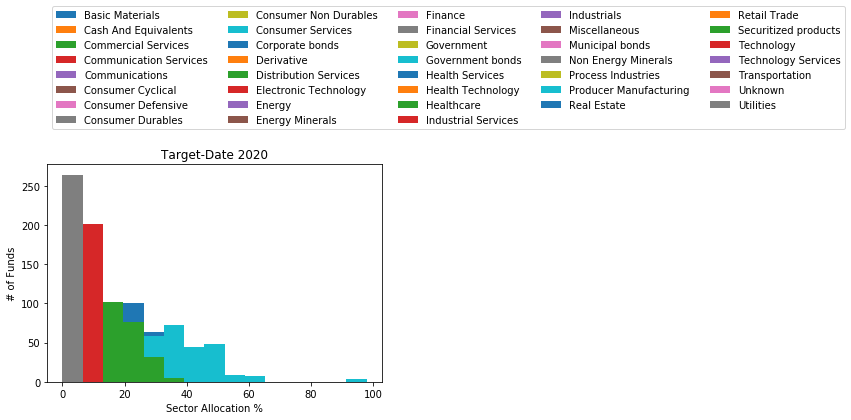

In [701]:
subms.iloc[:,2:][subms.CategoryName=='Target-Date 2020'].plot(kind='hist',bins=15)
plt.legend(bbox_to_anchor=(0, 1.75), loc='upper left', ncol=5)
plt.title('Target-Date 2020')
plt.ylabel('# of Funds')
plt.xlabel('Sector Allocation %')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

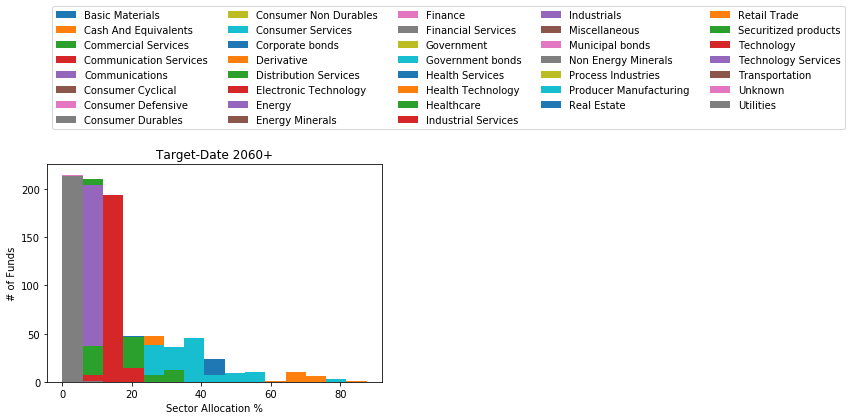

In [702]:
subms.iloc[:,2:][subms.CategoryName=='Target-Date 2060+'].plot(kind='hist',bins=15)
plt.legend(bbox_to_anchor=(0, 1.75), loc='upper left', ncol=5)
plt.title('Target-Date 2060+')
plt.ylabel('# of Funds')
plt.xlabel('Sector Allocation %')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

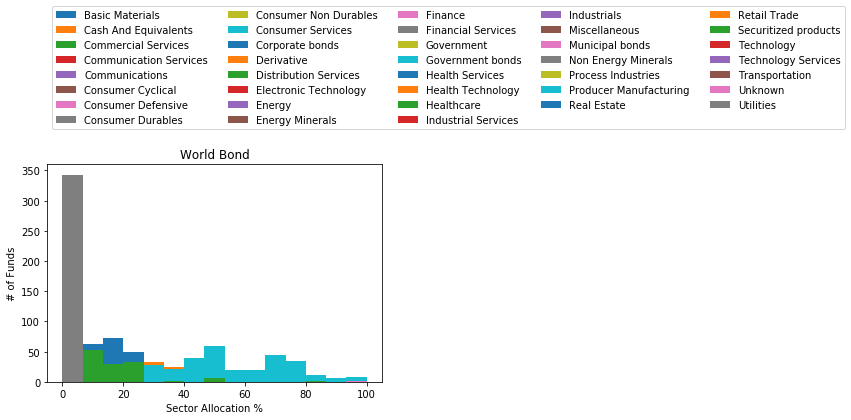

In [703]:
subms.iloc[:,2:][subms.CategoryName=='World Bond'].plot(kind='hist',bins=15)
plt.legend(bbox_to_anchor=(0, 1.75), loc='upper left', ncol=5)
plt.title('World Bond')
plt.ylabel('# of Funds')
plt.xlabel('Sector Allocation %')
plt.show